In [1]:
import os
import sys
cwd = os.getcwd()
ooipy_dir = os.path.dirname(os.path.dirname(cwd)) + '/ooipy'
sys.path.append(ooipy_dir)
from ooipy.hydrophone import Noise_Interferometry
from matplotlib import pyplot as plt
import datetime
import numpy as np
from obspy import read,Stream, Trace
from obspy.core import UTCDateTime
import pickle
import scipy
from gwpy.timeseries import TimeSeries
import seaborn as sns
import gwpy
import progressbar

cwd = os.getcwd()
code_dir = os.path.dirname(os.path.dirname(cwd))
sys.path.append(code_dir)

from Noise_Interferometry.Modules import analysis
from Noise_Interferometry.Modules import snr_tools

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
filename = 'SNRs.pkl'
with open(filename, 'rb') as f:
    SNRs = pickle.load(f)

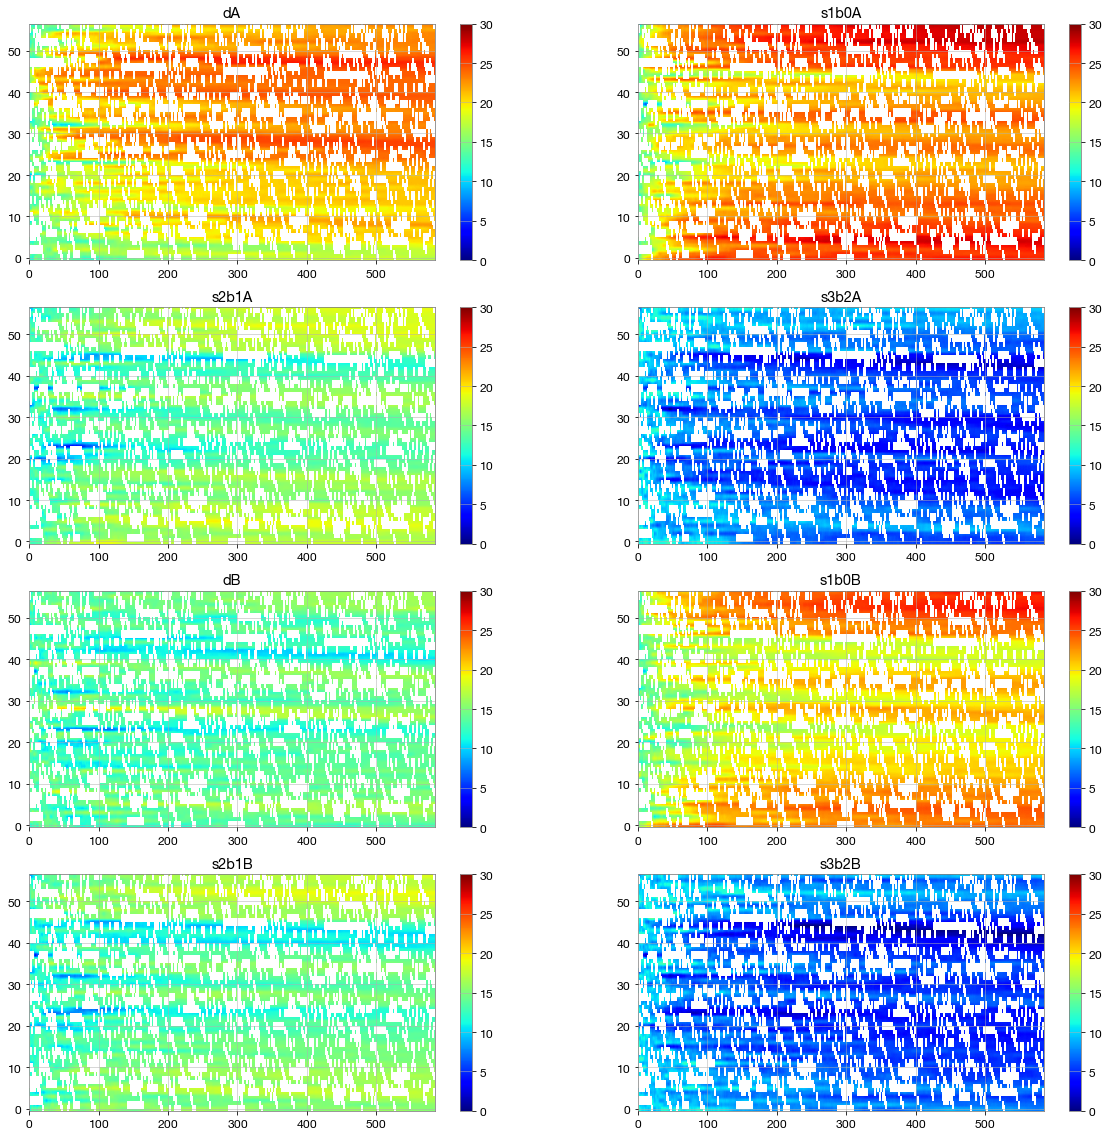

In [4]:
# Create Subplots with missing data
fig1 = plt.figure(figsize=(20,20))

peak_names = ['dA', 's1b0A', 's2b1A', 's3b2A', 'dB', 's1b0B', 's2b1B', 's3b2B']

for k in range(8):
    plt.subplot(4,2,k+1)
    plt.imshow(np.squeeze(SNRs[k,:,:]),aspect='auto', origin='lower', vmin=0, vmax=30, cmap='jet')
    plt.title(peak_names[k])
    plt.colorbar()
    
    
fig1.savefig('SNR_plots_gap.png',dpi=300)


## Make Gapless Plots

In [137]:
SNRs_no_gap = np.zeros(SNRs.shape)

for k in range(8):
    for n in range(57):
        no_gap = SNRs[k,n,~SNRs.mask[k,n,:]]
        SNRs_no_gap[k,n,:no_gap.shape[0]] = no_gap

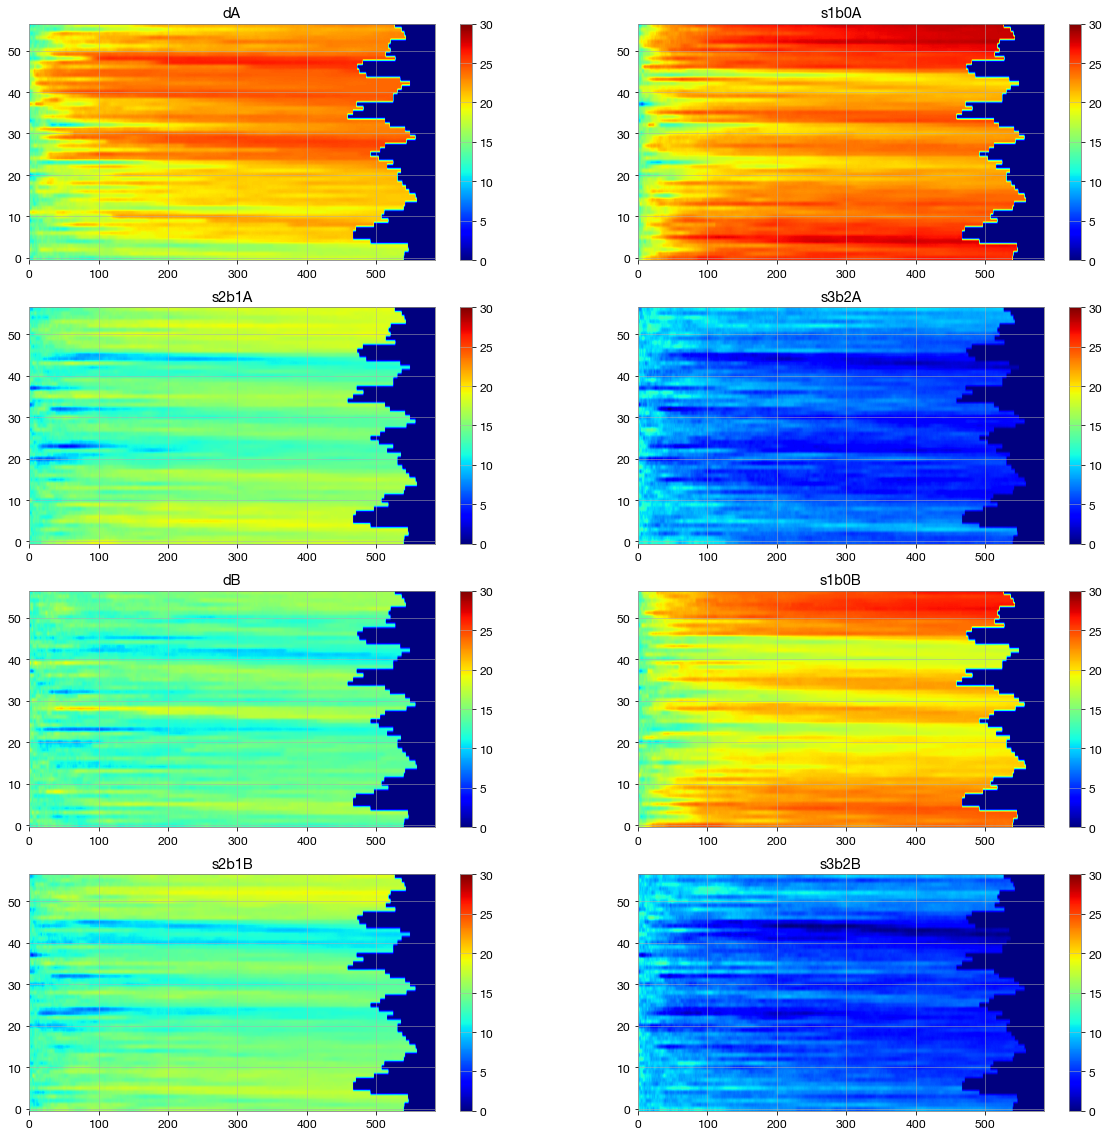

In [369]:
# Create Subplots with missing data
fig2 = plt.figure(figsize=(20,20))

peak_names = ['dA', 's1b0A', 's2b1A', 's3b2A', 'dB', 's1b0B', 's2b1B', 's3b2B']
for k in range(8):
    plt.subplot(4,2,k+1)
    plt.imshow(np.squeeze(SNRs_no_gap[k,:,:]),aspect='auto', origin='lower', vmin=0, vmax=30, cmap='jet')
    plt.title(peak_names[k])
    plt.colorbar()
    
fig2.savefig('SNR_plots_no_gap.png',dpi=300)

## Building SNR_energy function

In [3]:
file_name = "/Users/jhrag/Code/ocean_acoustics/Noise_Interferometry/NCFs/MJ03F-MJ03E/2017"
exp1 = analysis.NCCF_experiment(file_name, verbose=True)

#exp1.available_hours(savefig=True)
#print(exp1.num_available)

Start Time: 2017-01-01 00:00:00
Frequency Range: [ 1 90]
Hydrophone Type: low_frequency
Number of Average Periods: 8760
Node 1: Central_Caldera
Node 2: Eastern_Caldera
Window Length (s): 30
Signal Processing Method: sabra_b
Specific Notes: Butterworth and Hann Window for whitening. Longterm Analysis
Distance Between Nodes: 3.186 km
Bearing from node 1 to 2: 121.6 °


In [4]:
nccfs_array = exp1.MA_TDGF(101,1,start_hour=0,end_hour=1000, verbose=True)

[======================================================================= ]  98%

N: 600
(8160, 600)
M: 200
(8160, 200)


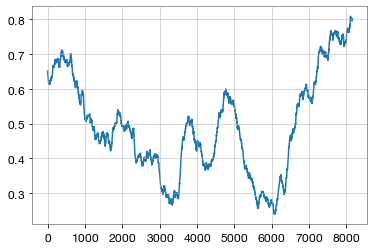

In [402]:
SNR = nccfs_601.snr_of_peak_energy('s1b0B')

plt.plot(SNR)

/Users/jhrag/Code/ocean_acoustics/Noise_Interferometry/Modules/analysis.py:1198: UserWarning: Peak index jumps more than 3 in single step
  warnings.warn('Peak index jumps more than 3 in single step')
/Users/jhrag/Code/ocean_acoustics/Noise_Interferometry/Modules/analysis.py:1198: UserWarning: Peak index jumps more than 3 in single step
  warnings.warn('Peak index jumps more than 3 in single step')
/Users/jhrag/Code/ocean_acoustics/Noise_Interferometry/Modules/analysis.py:1198: UserWarning: Peak index jumps more than 3 in single step
  warnings.warn('Peak index jumps more than 3 in single step')


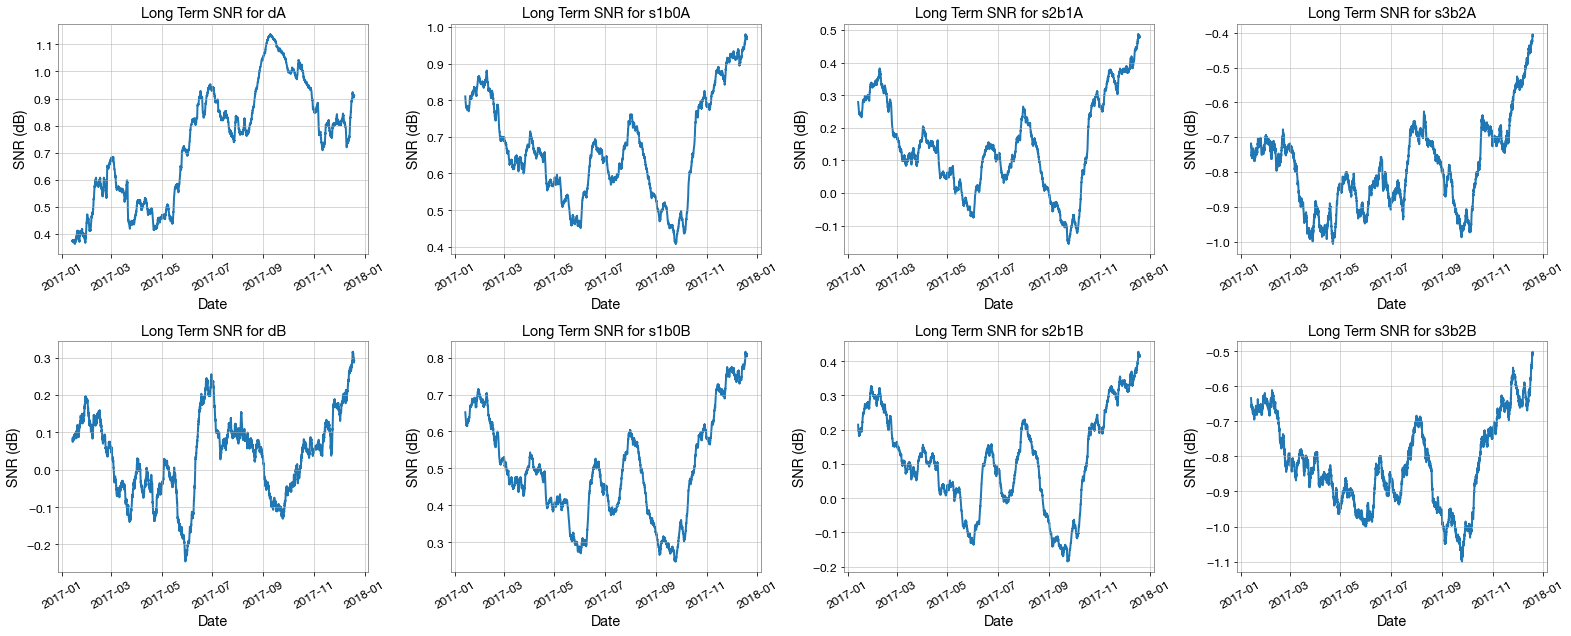

In [405]:
peak_names = ['dA','s1b0A','s2b1A','s3b2A', 'dB','s1b0B','s2b1B','s3b2B']
count = 0
fig, axes = plt.subplots(2,4, figsize=(22,9))
for ax in fig.get_axes():

    snr_enr = nccfs_601.snr_of_peak_energy(peak_names[count])
    snr_amp, _, _ = nccfs_601.snr_of_peak_amp(peak_names[count])

    #ax.plot(nccfs_601.dates, snr_amp, linewidth=2)
    ax.plot(nccfs_601.dates, snr_enr, linewidth=2)
    
    #ax.legend(['101 Hours','301 Hours','601 Hours'],loc='lower right')
    ax.set_title(f'Long Term SNR for {peak_names[count]}')
    ax.set_ylabel('SNR (dB)')
    ax.set_xlabel('Date')

    plt.sca(ax)
    plt.xticks(rotation=30)
    count = count + 1
plt.tight_layout()

fig.savefig('Long_Term_SNR_601_energy_c.png',dpi=200)

## Threshold Plots

In [214]:
filename = 'SNRs.pkl'
with open(filename, 'rb') as f:
    SNRs = pickle.load(f)
    
print(SNRs.shape)

# Create Date Array
base = datetime.datetime(2017, 1, 1)
dates = np.array([base + datetime.timedelta(hours=i) for i in range(8760)])

for k in range(len(dates)):
    dates[k] = dates[k].strftime('%Y-%m-%d')
hours = np.arange(1,SNRs.shape[2])
yticks = [0, 10, 20, 30, 40, 50]
ytick_labels = dates[np.array(yticks)*147]

(8, 57, 585)


### Gaps Present

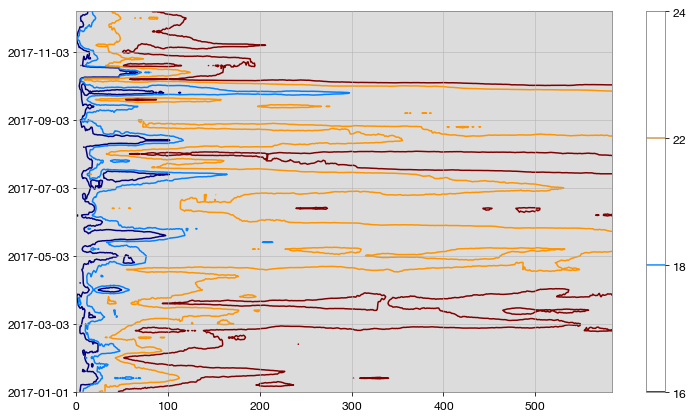

In [373]:
peak1 = np.squeeze(SNRs[1,:,:]).data
fig1, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,7))

levels = [16,18,22,24]
plt.contour(peak, levels=levels, cmap='jet')#, levels=levels)
plt.colorbar()

ax.set_yticks(yticks)
ax.set_yticklabels(ytick_labels)

ax.set_facecolor('#DCDCDC')

fig1.savefig('threshold_gap.png',dpi=300)

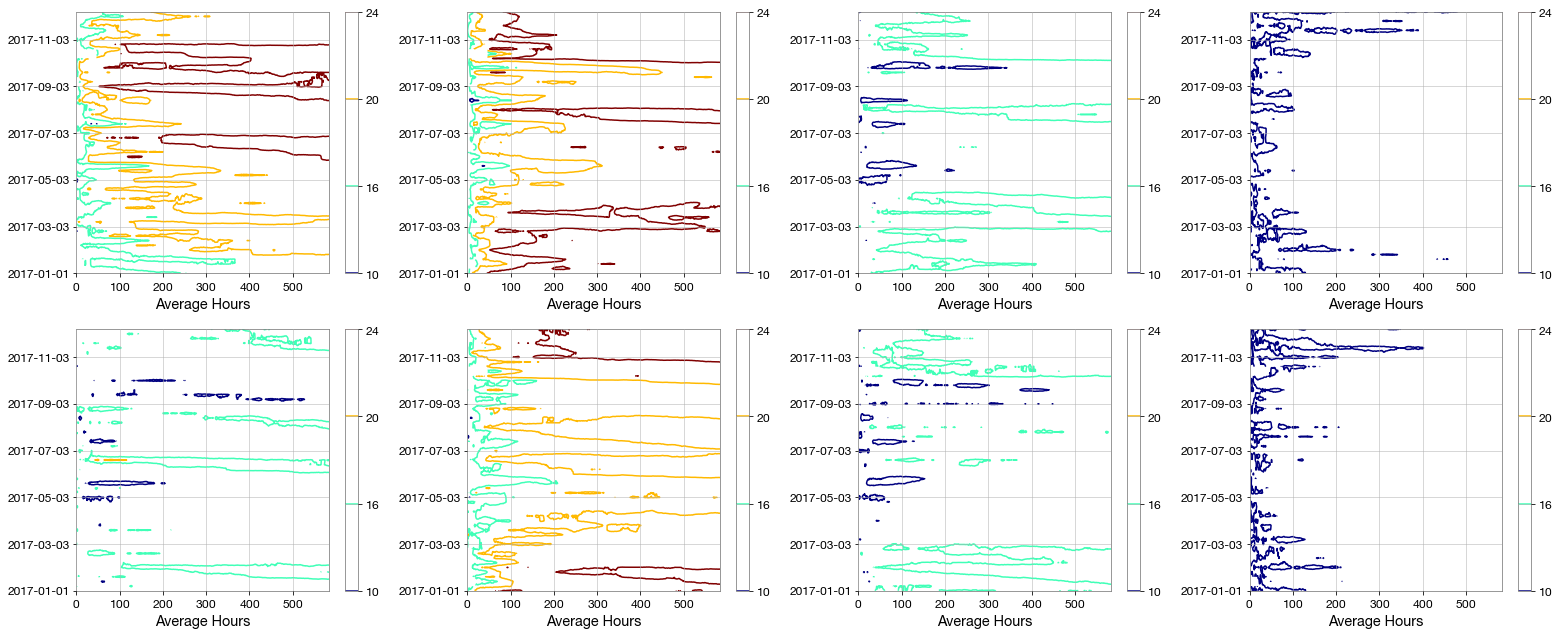

In [395]:
peak_names = ['dA','s1b0A','s2b1A','s3b2A', 'dB','s1b0B','s2b1B','s3b2B']
count = 0
fig, axes = plt.subplots(2,4, figsize=(22,9))
for ax in fig.get_axes():
    
    plt.sca(ax)
    levels = [10,16,20,24]
    
    thresh_im = np.squeeze(SNRs[count,:,:]).data
    plt.contour(thresh_im, levels=levels, cmap='jet')#, levels=levels)
    #plt.colorbar()

    ax.set_yticks(yticks)
    ax.set_yticklabels(ytick_labels)

    #ax.set_facecolor('#9ACD32')
    plt.colorbar()
    plt.xlabel('Average Hours')

    count = count + 1
plt.tight_layout()
fig.savefig('Threshold_Plots_gaps.png',dpi=200)

### No Gaps

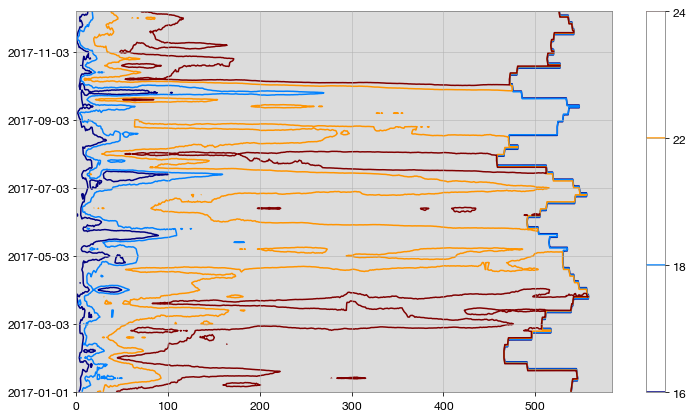

In [216]:
peak2 = np.squeeze(SNRs_no_gap[1,:,:])

fig2, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(12,7))


levels = [16,18,22,24]
plt.contour(peak2, levels=levels, cmap='jet')#, levels=levels)
plt.colorbar()

ax2.set_facecolor('#DCDCDC')

ax2.set_yticks(yticks)
ax2.set_yticklabels(ytick_labels)

fig2.savefig('threshold_no_gaps.png',dpi=300)

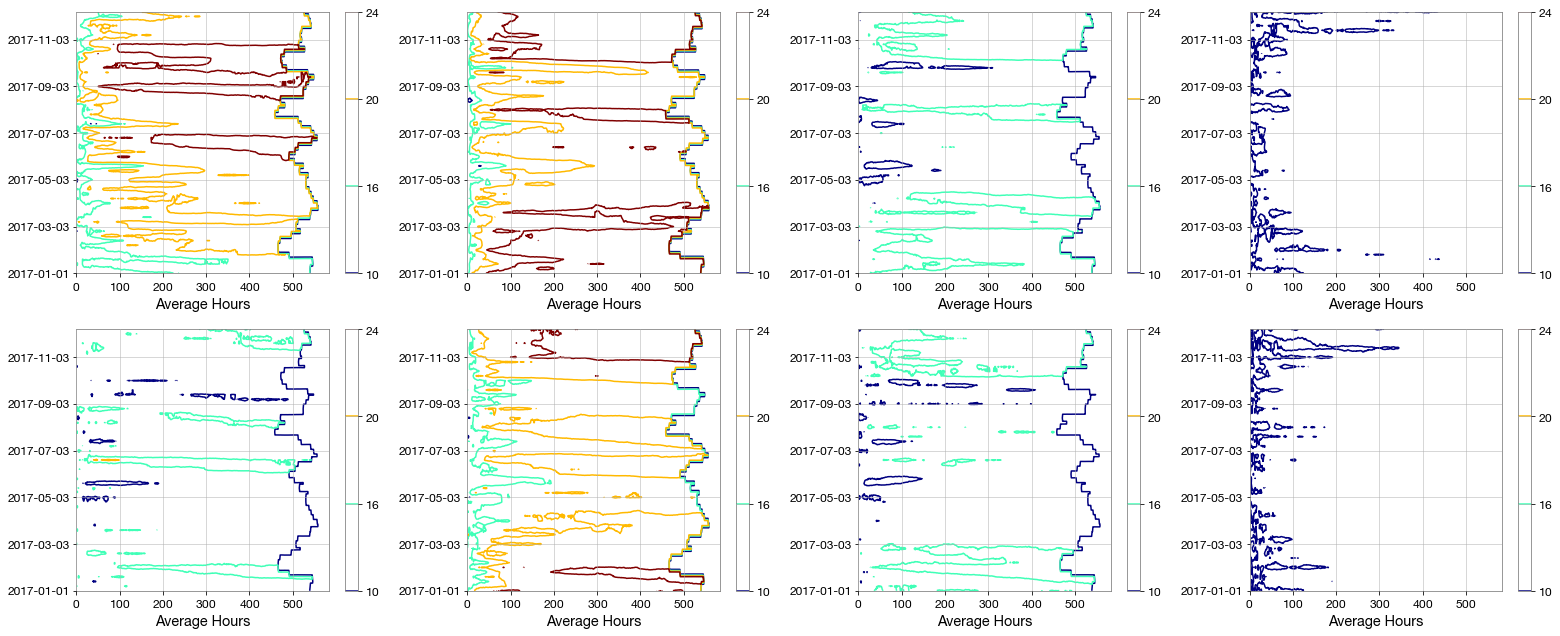

In [396]:
peak_names = ['dA','s1b0A','s2b1A','s3b2A', 'dB','s1b0B','s2b1B','s3b2B']
count = 0
fig, axes = plt.subplots(2,4, figsize=(22,9))
for ax in fig.get_axes():
    
    plt.sca(ax)
    levels = [10,16,20,24]
    thresh_im = np.squeeze(SNRs_no_gap[count,:,:])
    plt.contour(thresh_im, levels=levels, cmap='jet')#, levels=levels)
    #plt.colorbar()

    ax.set_yticks(yticks)
    ax.set_yticklabels(ytick_labels)

    #ax.set_facecolor('#DCDCDC')
    plt.colorbar()
    plt.xlabel('Average Hours')

    count = count + 1
plt.tight_layout()
fig.savefig('Threshold_Plots_no_gaps.png',dpi=200)

## Longterm SNR Plots

In [287]:
file_name = "/Users/jhrag/Code/ocean_acoustics/Noise_Interferometry/NCFs/MJ03F-MJ03E/2017"
exp1 = analysis.NCCF_experiment(file_name, verbose=True)
nccfs_101 = exp1.MA_TDGF(101,1,start_hour=0,end_hour=8760, verbose=True)
nccfs_301 = exp1.MA_TDGF(301,1,start_hour=0,end_hour=8760, verbose=True)
nccfs_601 = exp1.MA_TDGF(601,1,start_hour=0,end_hour=8760, verbose=True)

[                                                                        ] N/A%

Start Time: 2017-01-01 00:00:00
Frequency Range: [ 1 90]
Hydrophone Type: low_frequency
Number of Average Periods: 8760
Node 1: Central_Caldera
Node 2: Eastern_Caldera
Window Length (s): 30
Signal Processing Method: sabra_b
Specific Notes: Butterworth and Hann Window for whitening. Longterm Analysis
Distance Between Nodes: 3.186 km
Bearing from node 1 to 2: 121.6 °


[======================================================================= ]  98%

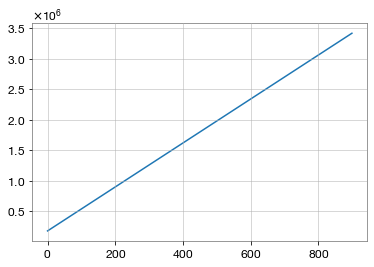

In [258]:
# Convert dates to datetime64
dates_101 = []
for k in range(len(nccfs_101.dates)):
    delta = nccfs_101.dates[k] - datetime.datetime(2017,1,1)
    dates_101.append(delta.total_seconds())
    
dates_301 = []
for k in range(len(nccfs_301.dates)):
    delta = nccfs_301.dates[k] - datetime.datetime(2017,1,1)
    dates_301.append(delta.total_seconds())
    
dates_601 = []
for k in range(len(nccfs_601.dates)):
    delta = nccfs_601.dates[k] - datetime.datetime(2017,1,1)
    dates_601.append(delta.total_seconds())

/Users/jhrag/Code/ocean_acoustics/Noise_Interferometry/Modules/analysis.py:1198: UserWarning: Peak index jumps more than 3 in single step
  warnings.warn('Peak index jumps more than 3 in single step')
/Users/jhrag/Code/ocean_acoustics/Noise_Interferometry/Modules/analysis.py:1198: UserWarning: Peak index jumps more than 3 in single step
  warnings.warn('Peak index jumps more than 3 in single step')
/Users/jhrag/Code/ocean_acoustics/Noise_Interferometry/Modules/analysis.py:1198: UserWarning: Peak index jumps more than 3 in single step
  warnings.warn('Peak index jumps more than 3 in single step')
/Users/jhrag/Code/ocean_acoustics/Noise_Interferometry/Modules/analysis.py:1198: UserWarning: Peak index jumps more than 3 in single step
  warnings.warn('Peak index jumps more than 3 in single step')
/Users/jhrag/Code/ocean_acoustics/Noise_Interferometry/Modules/analysis.py:1198: UserWarning: Peak index jumps more than 3 in single step
  warnings.warn('Peak index jumps more than 3 in single st

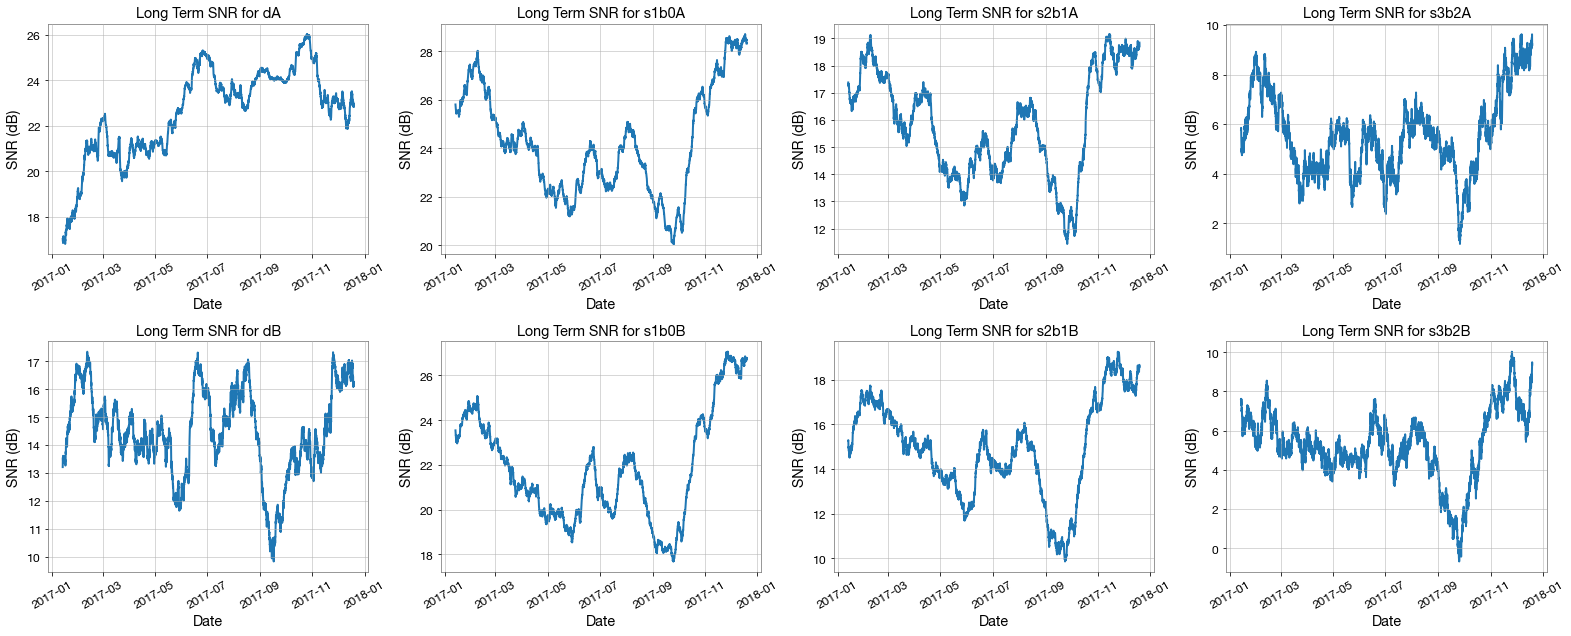

In [363]:
peak_names = ['dA','s1b0A','s2b1A','s3b2A', 'dB','s1b0B','s2b1B','s3b2B']
count = 0
fig, axes = plt.subplots(2,4, figsize=(22,9))
for ax in fig.get_axes():

    snr101, peak_time101, _ = nccfs_101.snr_of_peak_amp(peak_names[count])
    snr301, peak_time301, _ = nccfs_301.snr_of_peak_amp(peak_names[count])
    snr601, peak_time601, _ = nccfs_601.snr_of_peak_amp(peak_names[count])

    #ax.plot(nccfs_101.dates, snr101, linewidth=2)
    #ax.plot(nccfs_301.dates, snr301, linewidth=2)
    ax.plot(nccfs_601.dates, snr601, linewidth=2)
    
    
    #ax.legend(['101 Hours','301 Hours','601 Hours'],loc='lower right')
    ax.set_title(f'Long Term SNR for {peak_names[count]}')
    ax.set_ylabel('SNR (dB)')
    ax.set_xlabel('Date')

    plt.sca(ax)
    plt.xticks(rotation=30)
    count = count + 1
plt.tight_layout()

fig.savefig('Long_Term_SNR_601.png',dpi=200)

/Users/jhrag/Code/ocean_acoustics/Noise_Interferometry/Modules/analysis.py:1198: UserWarning: Peak index jumps more than 3 in single step
  warnings.warn('Peak index jumps more than 3 in single step')
/Users/jhrag/Code/ocean_acoustics/Noise_Interferometry/Modules/analysis.py:1198: UserWarning: Peak index jumps more than 3 in single step
  warnings.warn('Peak index jumps more than 3 in single step')
/Users/jhrag/Code/ocean_acoustics/Noise_Interferometry/Modules/analysis.py:1198: UserWarning: Peak index jumps more than 3 in single step
  warnings.warn('Peak index jumps more than 3 in single step')


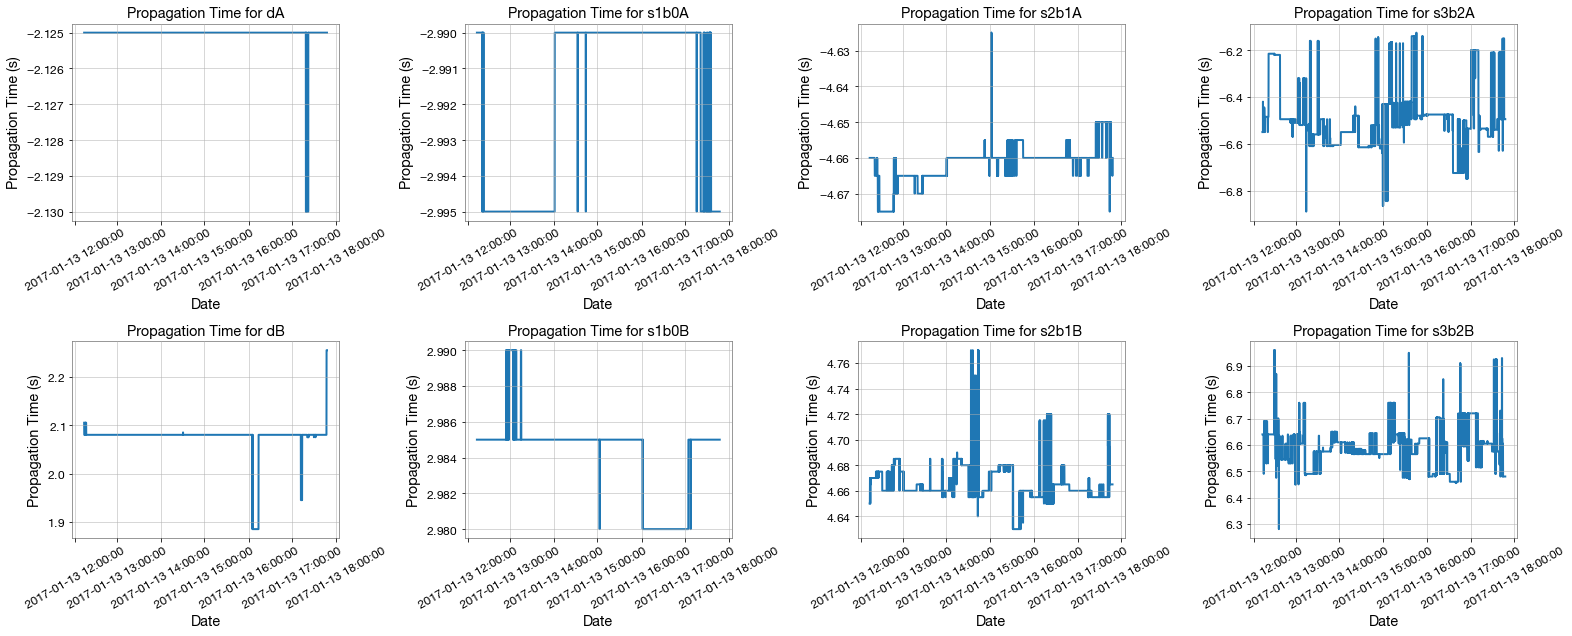

In [340]:
peak_names = ['dA','s1b0A','s2b1A','s3b2A', 'dB','s1b0B','s2b1B','s3b2B']
count = 0
fig2, axes2 = plt.subplots(2,4, figsize=(22,9))
for ax in fig2.get_axes():
    
    snr601, peak_time601, _ = nccfs_601.snr_of_peak_amp(peak_names[count])

    ax.plot(nccfs_601.dates, peak_time601, linewidth=2)
    ax.set_xticklabels(nccfs_601.dates, rotation=30)
    ax.set_title(f'Propagation Time for {peak_names[count]}')
    ax.set_ylabel('Propagation Time (s)')
    ax.set_xlabel('Date')

    plt.sca(ax)
    plt.xticks(rotation=30)
    '''
    idx1 = np.argmin(np.abs(nccfs_601.t - np.min(peak_time601)))
    idx2 = np.argmin(np.abs(nccfs_601.t - np.max(peak_time601)))

    t = np.vstack((nccfs_601.t,nccfs_601.t))

    ax.plot(nccfs_601.dates[0:8160:8159],t[:,idx1:idx2],'r')
    '''
    count = count + 1
plt.tight_layout()

fig2.savefig('Propagation.png',dpi=200)

(6.7, 6.8)

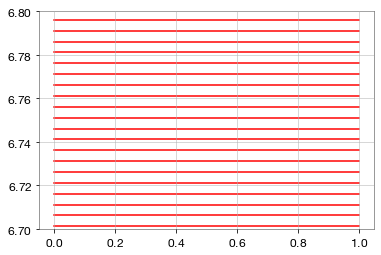

In [330]:
# Getting Time Bins
nccfs_601.t.shape
idx1 = np.argmin(np.abs(nccfs_601.t - np.min(peak_time601)))
idx2 = np.argmin(np.abs(nccfs_601.t - np.max(peak_time601)))

t = np.vstack((nccfs_601.t,nccfs_601.t))

plt.plot(t[:,idx1:idx2],'r')

### Playing with Peak Windows

/Users/jhrag/Code/ocean_acoustics/Noise_Interferometry/Modules/analysis.py:1198: UserWarning: Peak index jumps more than 3 in single step
  warnings.warn('Peak index jumps more than 3 in single step')


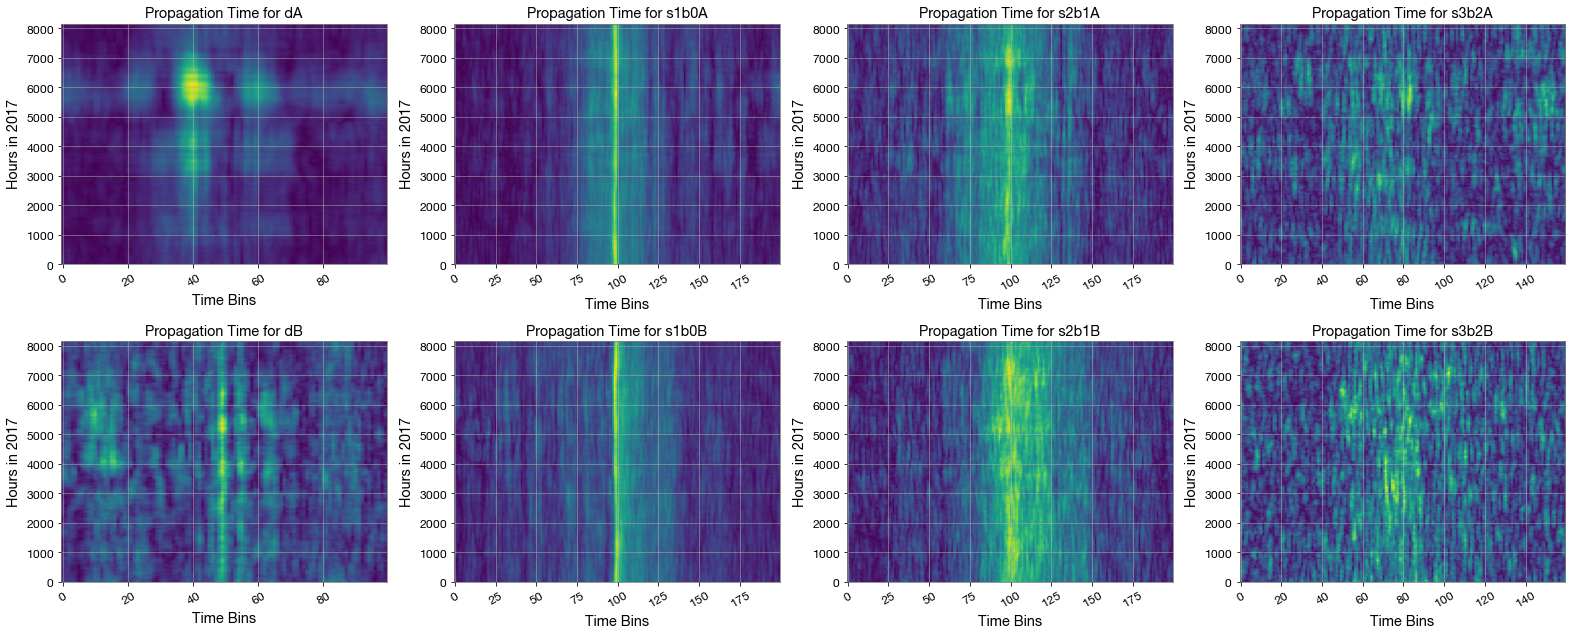

In [360]:
peak_names = ['dA','s1b0A','s2b1A','s3b2A', 'dB','s1b0B','s2b1B','s3b2B']
count = 0
fig3, axes3 = plt.subplots(2,4, figsize=(22,9))
for ax in fig3.get_axes():
    
    snr601, peak_idx, _ = nccfs_601.snr_of_peak_amp(peak_names[count])
    peak_image = np.abs(nccfs_601.NCCFs_c[:,nccfs_601.peak_slices[peak_names[count]]])
    ax.imshow(peak_image,aspect='auto', origin='lower')
    #ax.plot(peak_idx,np.arange(0,peak_image.shape[0]),'r',linewidth=2)
    ax.set_title(f'Propagation Time for {peak_names[count]}')
    ax.set_ylabel('Hours in 2017')
    ax.set_xlabel('Time Bins')
    plt.sca(ax)
    plt.xticks(rotation=30)

    count = count + 1
plt.tight_layout()


fig3.savefig('Peak_windows.png',dpi=200)

In [356]:
peak_image.shape

(8160, 160)